### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

### Importando pandas e lendo o dataset do projeto

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("dados_PNAD.csv")

In [ ]:
dados

UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0      11     0     23    8              12    800  1.603808
1      11     1     23    2              12   1150  1.739790
2      11     1     35    8              15    880  1.760444
3      11     0     46    2               6   3500  1.783158
4      11     1     47    8               9    150  1.690631
...    ..   ...    ...  ...             ...    ...       ...
76835  53     1     46    2              11    812  1.687030
76836  53     0     30    4               7   1500  1.792934
76837  53     0     32    8              12   1300  1.830587
76838  53     0     57    8               4   1500  1.726344
76839  53     0     38    8               4    900  1.658305

[76840 rows x 7 columns]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

### Distribuição de frequências por genero

In [4]:
frequencia = dados['Sexo'].value_counts()
percentual = dados['Sexo'].value_counts(normalize = True) * 100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})
dist_freq_qualitativas.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)
dist_freq_qualitativas

Sexo       Frequência  Porcentagem (%)
Masculino       53250        69.299844
Feminino        23590        30.700156

### Contabilizando a quantidade de pessoas por genero de cada etnia

In [6]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [7]:
frequencia = pd.crosstab(dados.Sexo,
                         dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor        Indígena  Branca  Preta  Amarela  Parda
Sexo                                              
Masculino       256   22194   5502      235  25063
Feminino        101    9621   2889      117  10862

### Calculando o percentual de pessoas por genero de cada etnia


In [8]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         normalize = True) * 100
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor        Indígena     Branca     Preta   Amarela      Parda
Sexo                                                         
Masculino  0.333160  28.883394  7.160333  0.305830  32.617126
Feminino   0.131442  12.520822  3.759761  0.152264  14.135867

### Calculando a renda média do genero de cada etnia

In [9]:
percentual = pd.crosstab(dados.Sexo,
                         dados.Cor,
                         aggfunc = 'mean',
                         values = dados.Renda)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor           Indígena       Branca        Preta      Amarela        Parda
Sexo                                                                      
Masculino  1081.710938  2925.744435  1603.861687  4758.251064  1659.577425
Feminino   2464.386139  2109.866750  1134.596400  3027.341880  1176.758516

### Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso <b>R$ 788,00</b> (2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


In [10]:
min(dados["Renda"])

0

In [11]:
max(dados["Renda"])

200000

### Definindo classes de rendas

In [12]:
classes = [0, 1576, 3152, 7880, 15760, 200000]
labels = ['E', 'D', 'C', 'B', 'A']

### Contabilizando a quantidade de pessoas de cada classe de renda

In [13]:
# Contabilizando a quantidade de pessoas de cada classe de renda
frequencia = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True)
)
# frequencia

In [14]:
# Contabilizando a porcentagem de pessoas de cada classe de renda
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
               bins = classes,
               labels = labels,
               include_lowest = True),
    normalize = True
)*100
# percentual

In [15]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_personalizadas.sort_index(ascending = False)

Frequência  Porcentagem (%)
A         608         0.791255
B        2178         2.834461
C        7599         9.889381
D       16700        21.733472
E       49755        64.751432

<AxesSubplot:>

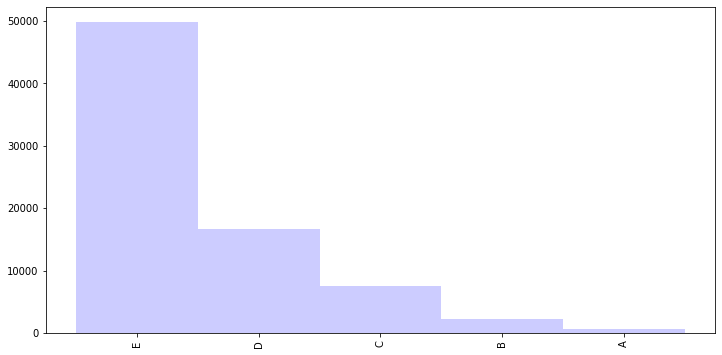

In [16]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))

### Média das features por sexo ordenados pela maior renda

In [17]:
df = dados.groupby(['Sexo']).mean().sort_values(by=["Renda"], ascending=False)
df.rename(index = {0: 'Masculino', 1: 'Feminino'}, inplace = True)
df

UF      Idade       Cor  Anos de Estudo        Renda  \
Sexo                                                                     
Masculino  31.901991  44.046554  5.038685        9.120169  2192.441596   
Feminino   31.937728  44.127554  5.018906       10.258584  1566.847393   

             Altura  
Sexo                 
Masculino  1.699443  
Feminino   1.699670

### Média das features por unidade federativa ordenados pela maior renda


In [18]:
uf = {11:"Rondônia",
        12:"Acre",
        13:"Amazonas",
        14:"Roraima",
        15:"Pará",
        16:"Amapá",
        17:"Tocantins",
        21:"Maranhão",
        22:"Piauí",
        23:"Ceará",
        24:"Rio Grande do Norte",
        25:"Paraíba",
        26:"Pernambuco",
        27:"Alagoas",
        28:"Sergipe",
        29:"Bahia",
        31:"Minas Gerais",
        32:"Espírito Santo",
        33:"Rio de Janeiro",
        35:"São Paulo",
        41:"Paraná",
        42:"Santa Catarina",
        43:"Rio Grande do Sul",
        50:"Mato Grosso do Sul",
        51:"Mato Grosso",
        52:"Goiás",
        53:"Distrito Federal"}

df = dados.groupby(['UF']).mean().sort_values(by=["Renda"], ascending=False)
df.rename(index = uf, inplace = True)
df

Sexo      Idade       Cor  Anos de Estudo  \
UF                                                                   
Distrito Federal     0.389971  42.734177  5.003895       11.910419   
São Paulo            0.310393  44.291081  4.072331       10.639045   
Rio de Janeiro       0.348812  45.100072  4.621670       10.547516   
Paraná               0.281680  44.084252  3.702020       10.084252   
Santa Catarina       0.242637  43.458901  2.798242       10.226813   
Rio Grande do Sul    0.328377  45.547928  2.857956       10.104556   
Mato Grosso do Sul   0.314583  43.719444  5.051389        9.509028   
Mato Grosso          0.280000  42.224444  5.544444        9.472778   
Minas Gerais         0.285714  45.243169  5.079886        9.129846   
Espírito Santo       0.273329  44.150232  4.947717        9.466578   
Goiás                0.258194  43.597182  5.381254        9.435883   
Amapá                0.355469  42.097656  6.363281       10.050781   
Rondônia             0.259597  42.476252  5.622642        8.811971   
Roraima              0.344444  41.966667  6.181481        9.916667   
Tocantins            0.266462  43.418070  6.058193        9.027565   
Pernambuco           0.334031  44.150524  5.786387        9.214921   
Acre                 0.255069  41.891142  6.155816        8.398079   
Amazonas             0.311877  42.788305  6.628286        9.361741   
Bahia                0.334266  44.323072  5.805842        8.725730   
Pará                 0.292875  43.250393  6.430209        8.672286   
Rio Grande do Norte  0.302158  42.864337  5.461459        8.823227   
Paraíba              0.291994  44.067504  5.729984        8.165620   
Ceará                0.337005  43.224769  6.167907        8.665079   
Alagoas              0.252492  43.077519  5.873754        7.838317   
Sergipe              0.293706  43.855478  6.262626        7.337995   
Piauí                0.292320  45.342692  6.340215        7.014038   
Maranhão             0.330162  43.741466  6.204813        7.518747   

                           Renda    Altura  
UF                                          
Distrito Federal     4241.954722  1.700896  
São Paulo            2638.104986  1.699321  
Rio de Janeiro       2496.403168  1.700365  
Paraná               2493.870753  1.699434  
Santa Catarina       2470.854945  1.698933  
Rio Grande do Sul    2315.158336  1.698710  
Mato Grosso do Sul   2262.604167  1.700184  
Mato Grosso          2130.652778  1.698339  
Minas Gerais         2056.432084  1.699988  
Espírito Santo       2026.383852  1.701513  
Goiás                1994.580794  1.699623  
Amapá                1861.353516  1.697891  
Rondônia             1789.761223  1.703967  
Roraima              1783.588889  1.698680  
Tocantins            1771.094946  1.699969  
Pernambuco           1527.079319  1.698141  
Acre                 1506.091782  1.699113  
Amazonas             1445.130100  1.699454  
Bahia                1429.645094  1.699282  
Pará                 1399.076871  1.698197  
Rio Grande do Norte  1344.721480  1.699135  
Paraíba              1293.370487  1.699266  
Ceará                1255.403692  1.700317  
Alagoas              1144.552602  1.693907  
Sergipe              1109.111111  1.702222  
Piauí                1074.550784  1.700189  
Maranhão             1019.432009  1.699708

In [19]:
### Média das rendas

In [20]:
dados.Renda.mean()

2000.3831988547631

### Mediana das rendas 

In [21]:
dados.Renda.median()

1200.0

### Moda das rendas

In [22]:
dados.Renda.mode()

0    788
dtype: int64

### Frequencia da renda das pessoas

<AxesSubplot:>

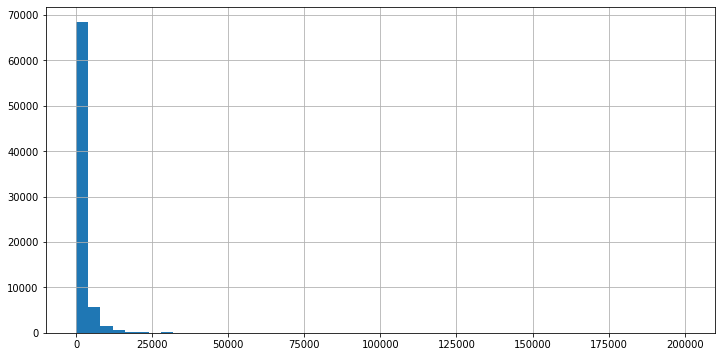

In [23]:
dados.Renda.hist(bins = 50, figsize=(12,6))

### Apresentando a frequncia das rendas menores que 20000

<AxesSubplot:>

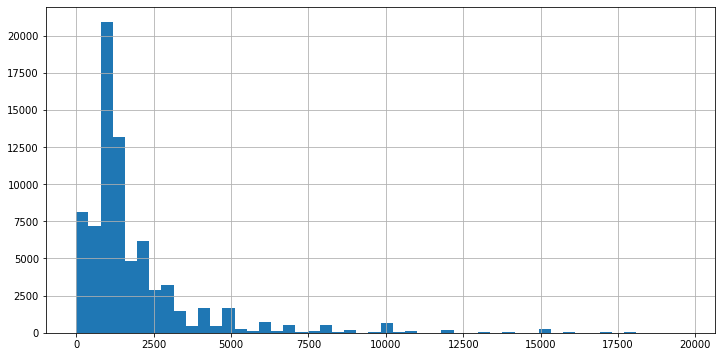

In [24]:
dados.query('Renda < 20000').Renda.hist(bins = 50, figsize=(12,6))

***

### Distribuição da frequencia de altura das pessoas

<AxesSubplot:>

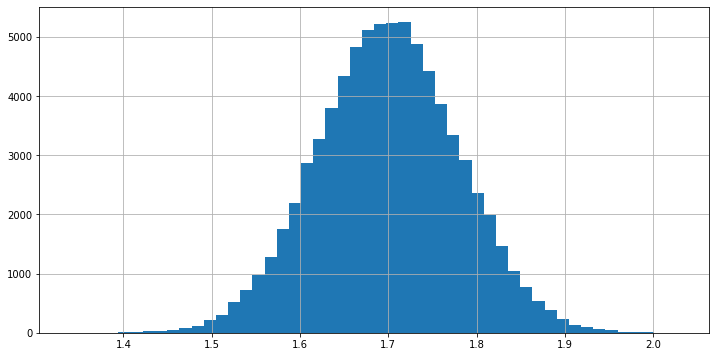

In [25]:
dados.Altura.hist(bins = 50, figsize=(12,6))

***

### Média de altura 

In [26]:
dados.Altura.mean()

1.6995124540575741

### Mediana de altura 

In [27]:
dados.Altura.median()

1.6993247325

### Moda de altura

In [28]:
dados.Altura.mode()[0]

1.56812756

***

### Frequencia dos anos de estudo das pessoas

In [29]:
dados['Anos de Estudo'].hist(bins = 17, figsize=(12,6))

<AxesSubplot:>

### Média de anos de estudo

In [30]:
dados['Anos de Estudo'].mean()

9.469664237376367

### Mediana de anos de estudo

In [31]:
dados['Anos de Estudo'].median()

11.0

### Moda de anos de estudo

In [32]:
dados['Anos de Estudo'].mode()[0]

12

***

### Correlação entre Renda e Anos de Estudo

Coeficiente de Correlação de Pearson
- 0.9 a 1 positivo ou negativo indica uma correlação muito forte.
- 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
- 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
- 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
- 0 a 0.3 positivo ou negativo indica uma correlação desprezível.


In [33]:
dados['Renda'].corr(dados['Anos de Estudo'])

0.3321515733834716

In [34]:
dados.plot.scatter(x='Anos de Estudo',
                      y='Renda',
                      c='DarkBlue')

<AxesSubplot:xlabel='Anos de Estudo', ylabel='Renda'>

In [40]:
dados.plot.bar(x='Anos de Estudo',
                      y='Renda',
                      c='Pink')

AttributeError: 'Rectangle' object has no property 'c'